<a href="https://colab.research.google.com/github/nolfflogan/Logan-Nolff-Project-Portfolio/blob/Master/PROJ_7_BANK_CHURN_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
# Library to split data
from sklearn.model_selection import train_test_split
# Library to encode the variables
from sklearn import preprocessing
# To plot confusion matrix
from sklearn.metrics import confusion_matrix
# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# library to import to standardize the data
from sklearn.preprocessing import StandardScaler
#To import different metrics
from sklearn import metrics
from tensorflow.keras import backend
# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")
# importing different functions to build models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf
# importing GridSearch CV
from sklearn.model_selection import GridSearchCV
# importing roc_curve to plot
from sklearn.metrics import roc_curve
from matplotlib import pyplot
# importing SMOTE
from imblearn.over_sampling import SMOTE
# importing metrics
from sklearn import metrics
import random
#Importing classback API
from keras import callbacks

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ds = pd.read_csv('/content/drive/MyDrive/Churn.csv')

In [ ]:
ds.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
ds.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
ds.shape

(10000, 14)

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [ ]:
ds.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [ ]:
ds.duplicated().sum()

0

In [ ]:
ds.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
ds=ds.drop(['RowNumber','CustomerId','Surname'],axis=1)

#EDA

***UNIVARIATE***

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize)  # creating the 2 subplots
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet")  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot( data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter") if bins else sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)  # For histogram
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")  # Add mean to the histogram
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values())

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points")  # annotate the percentage

    plt.show()  # show the plot

#CREDIT SCORE

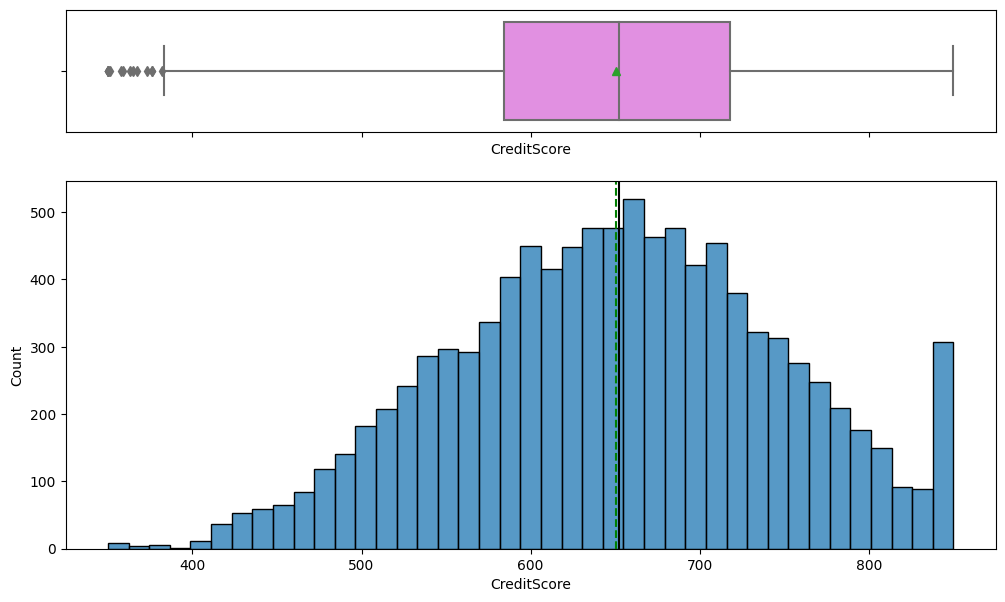

In [ ]:
histogram_boxplot(ds,'CreditScore')

#AGE

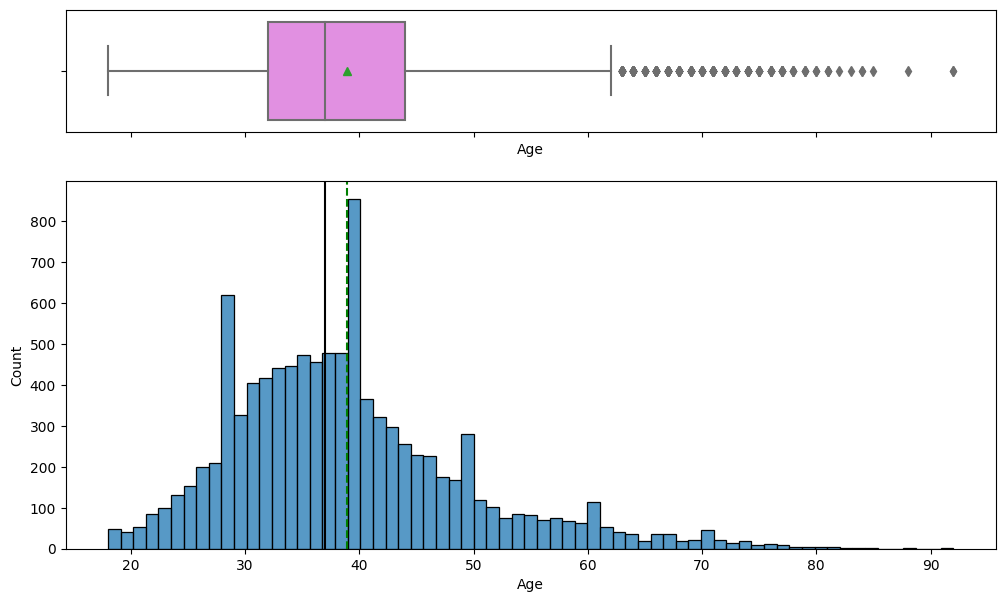

In [ ]:
histogram_boxplot(ds,'Age')

#BALANCE

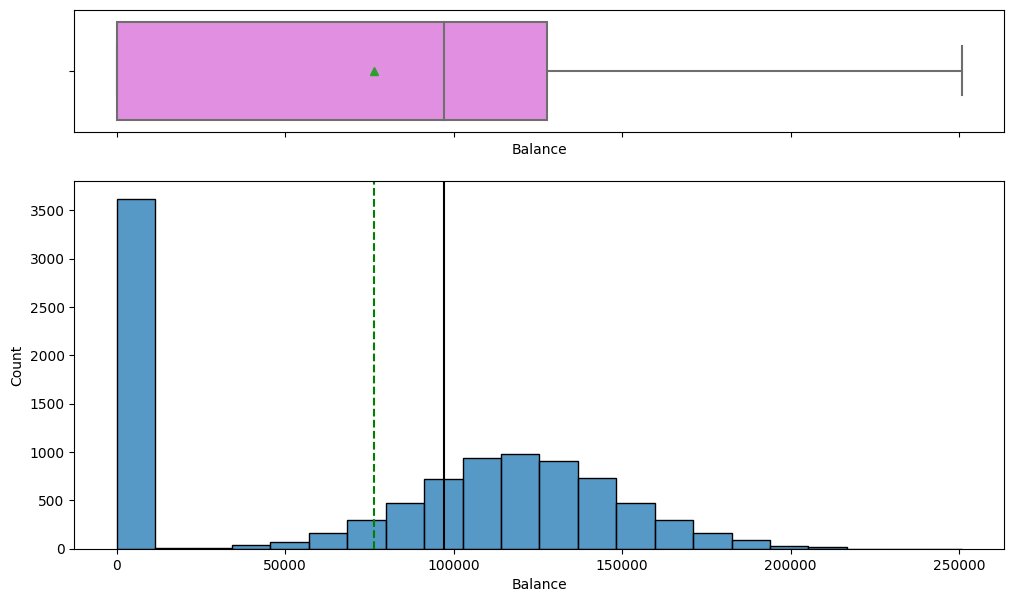

In [ ]:
histogram_boxplot(ds,'Balance')

#ESTIMATED SALARY

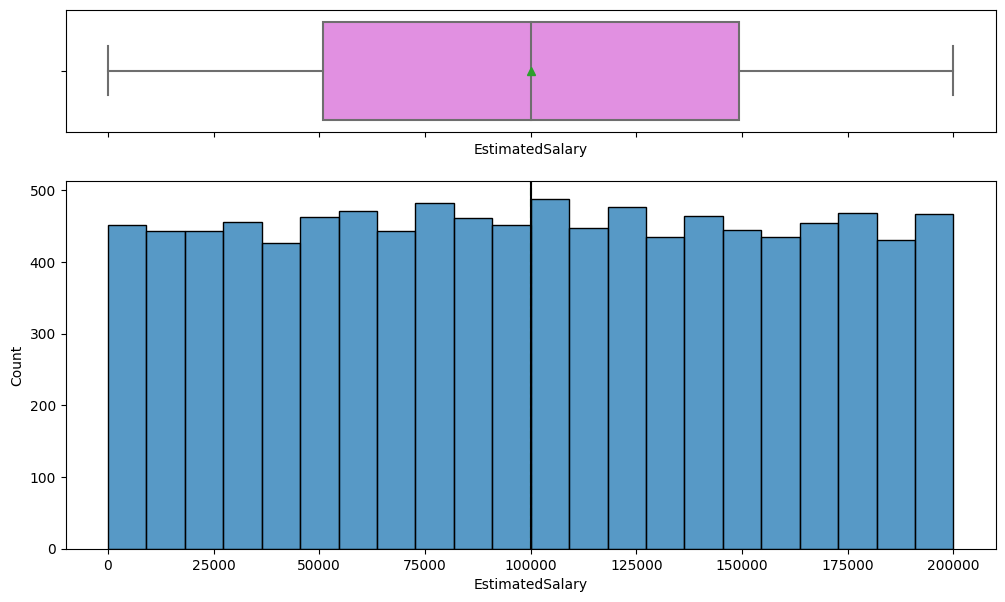

In [ ]:
histogram_boxplot(ds,'EstimatedSalary')

#EXITED

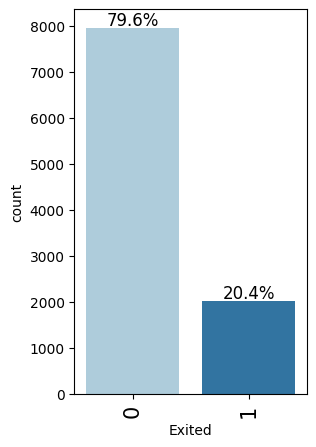

In [ ]:
labeled_barplot(ds, "Exited", perc=True)

#GEOGRAPHY

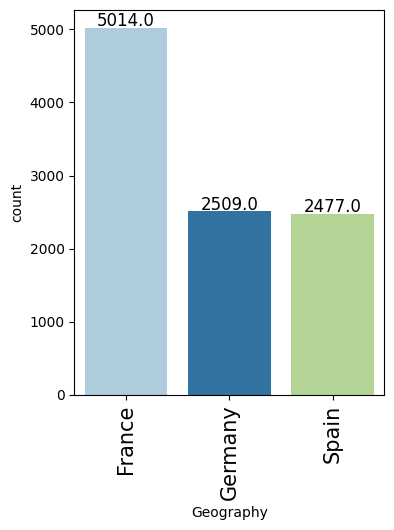

In [ ]:
labeled_barplot(ds, "Geography")

#GENDER

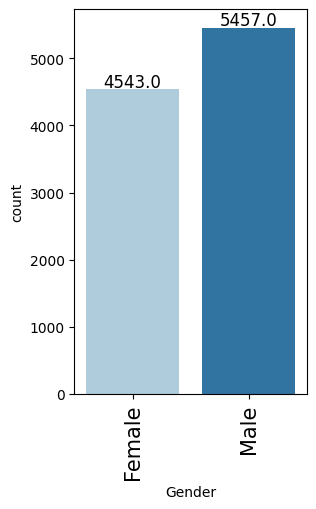

In [ ]:
labeled_barplot(ds, "Gender")

#TENURE

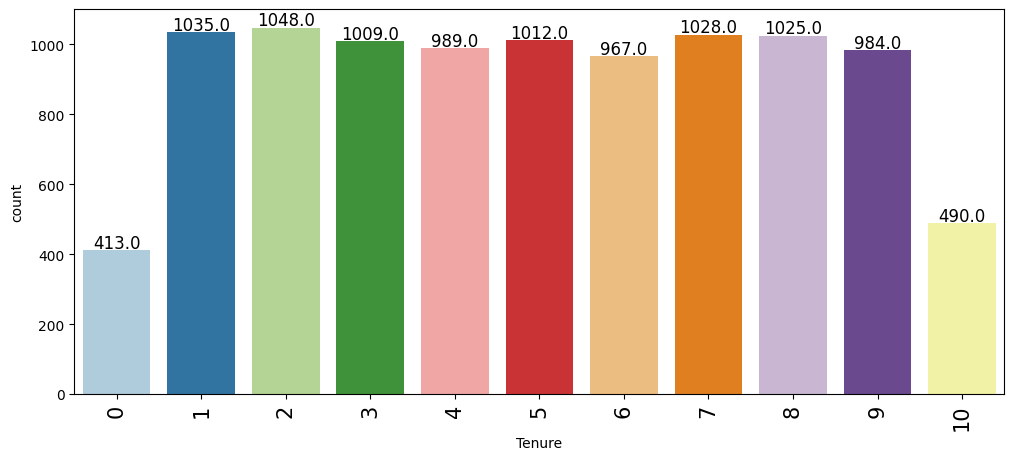

In [ ]:
labeled_barplot(ds, "Tenure")

#NUMBER OF PRODUCTS

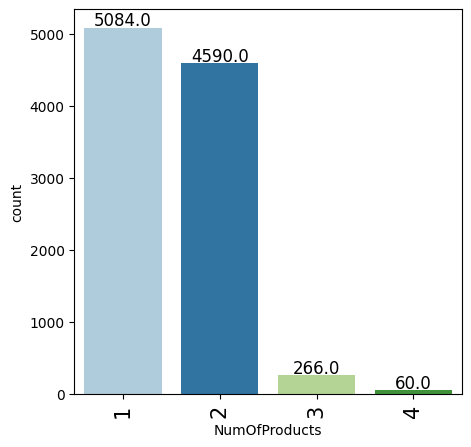

In [ ]:
labeled_barplot(ds, "NumOfProducts")

#HAS CREDIT CARD

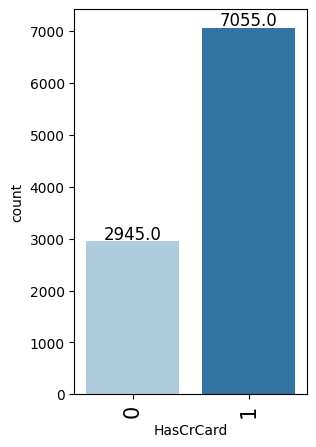

In [ ]:
labeled_barplot(ds, "HasCrCard")

#ACTIVE MEMBER

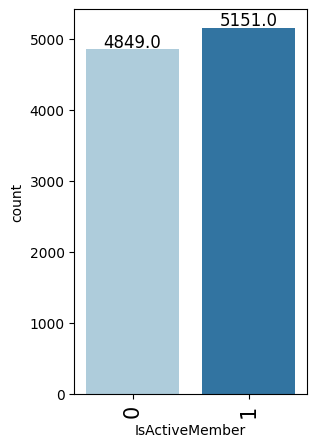

In [ ]:
labeled_barplot(ds, "IsActiveMember")

***BIVARIATE ANALYSIS***

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(by=sorter, ascending=False)
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(loc="lower left",frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

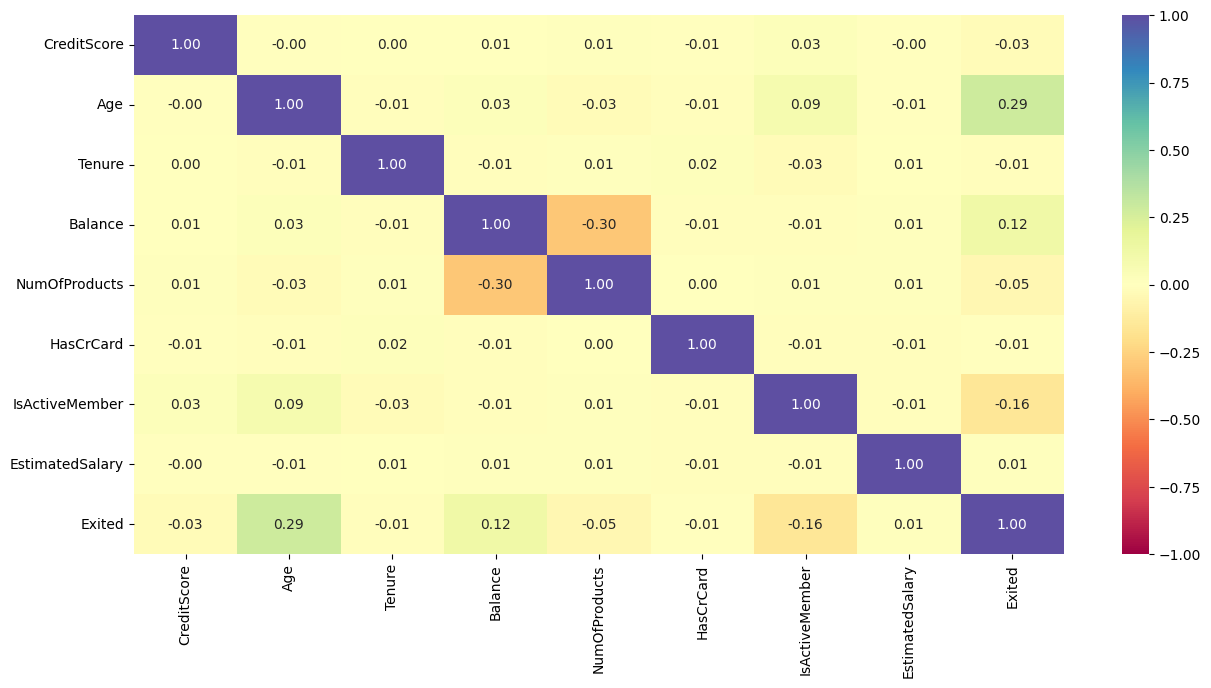

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(ds.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")          # Complete the code to get the heatmap of the data
plt.show()

#EXITED V GEOGRAPHY

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


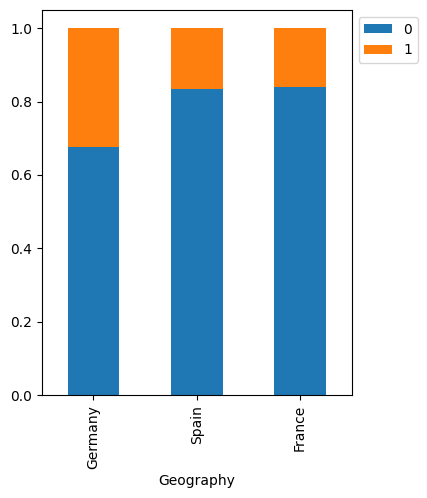

In [ ]:
stacked_barplot(ds, "Geography", "Exited" )

#EXITED V GENDER

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


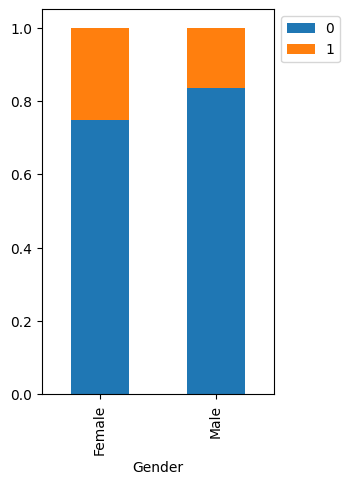

In [ ]:
stacked_barplot(ds, "Gender", "Exited" )

#EXITED V HAS CREDIT CARD

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


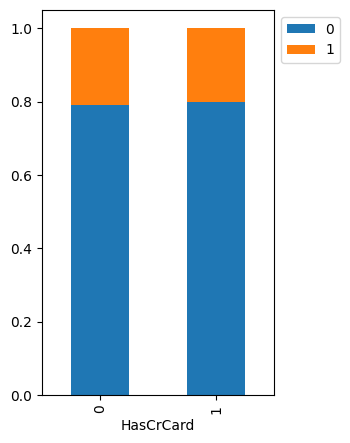

In [ ]:
stacked_barplot(ds, "HasCrCard", "Exited" )

#EXITED V IS ACTIVE MEMBER

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


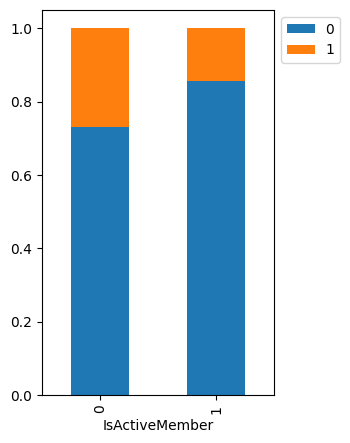

In [ ]:
stacked_barplot(ds, "IsActiveMember", "Exited" )

#EXITED V CREDIT SCORE

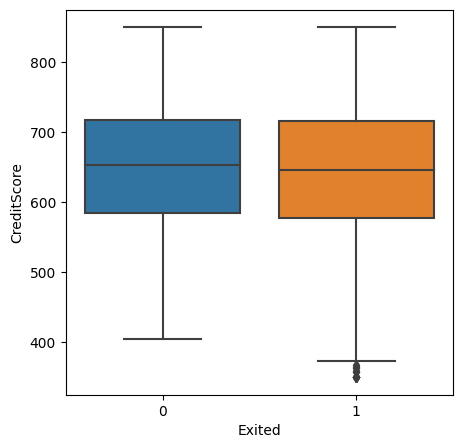

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='CreditScore',x='Exited',data=ds)
plt.show()

#EXITED V AGE

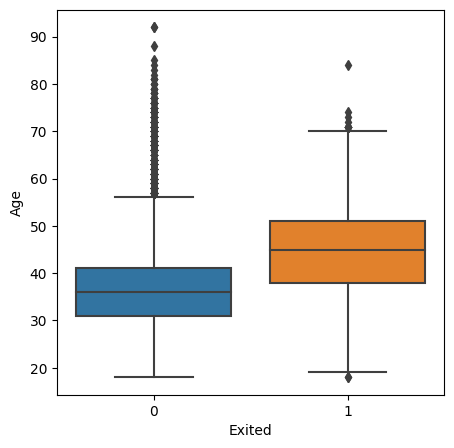

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Age',x='Exited',data=ds)
plt.show()

#EXITED V TENURE

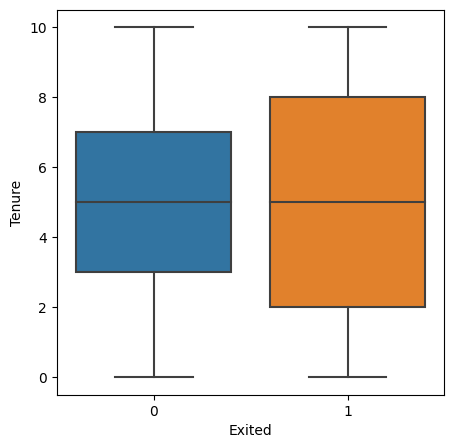

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Tenure',x='Exited',data=ds)
plt.show()

#EXITED V BALANCE

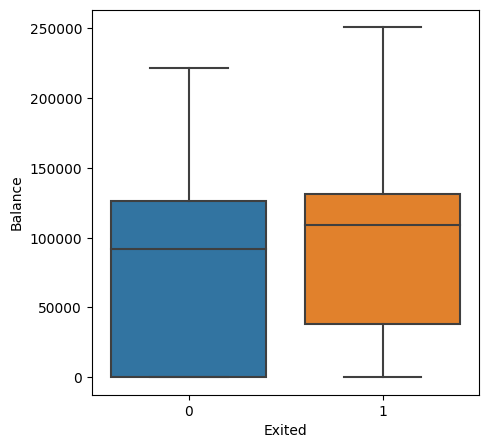

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Balance',x='Exited',data=ds)
plt.show()

#EXITED V NUMBER OF PRODUCTS

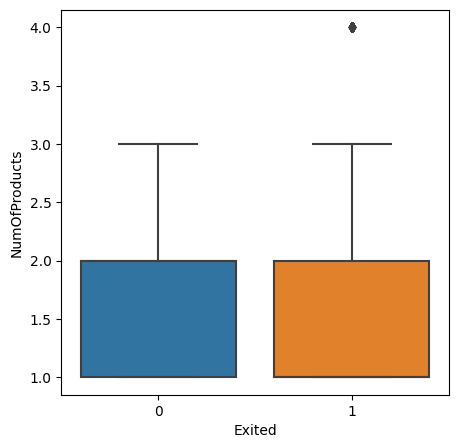

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='NumOfProducts',x='Exited',data=ds)
plt.show()

#EXITED V ESTIMATED SALARY

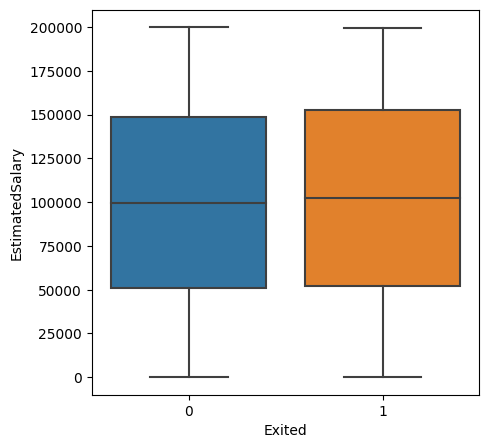

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='EstimatedSalary',x='Exited',data=ds)
plt.show()

***DATA PREPROCESSING***

In [ ]:
X = ds.drop(['Exited'],axis=1)    ## Complete the code to obtain the independent features into variable X
y = ds[['Exited']]                ## Complete the code to obtain the dependent features into variable y

In [ ]:
# Splitting the dataset into the Training and Testing set.

X_large, X_test, y_large, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42,stratify=y,shuffle = True) ## Complete the code to Split the X and y and obtain test set

In [ ]:
# Splitting the dataset into the Training and Testing set.

X_train, X_val, y_train, y_val = train_test_split(X_large,y_large, test_size = 0.2, random_state = 42,stratify=y_large, shuffle = True) ## complete the code to Split X_large and y_large to obtain train and validation sets

***CREATE DUMMIES FOR STRING VARIABLES***

In [ ]:
# Encoding Geography variable
X_train = pd.get_dummies(X_train, columns=["Geography","Gender"],drop_first=True) ## Complete the code to encode Geography and Gender in train set
X_test = pd.get_dummies(X_test, columns=["Geography","Gender"],drop_first=True)   ## Complete the code to encode Geography and Gender in test set
X_val = pd.get_dummies(X_val, columns=["Geography","Gender"],drop_first=True)     ## Complete the code to encode Geography and Gender in validation set

***NORMALIZE NUMERICAL DATA***

In [ ]:
## Complete the below code to scale the data using standardscaler
sc=StandardScaler()
temp = sc.fit(X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
X_test[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_test[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
X_val[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_val[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])

***MODEL BUILDING***

In [ ]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

#***MODEL BUILDING:NEURAL NETWORK***

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Initializing the ANN
classifier = Sequential()
# Complete the code to Add the input layer with 64 neurons with relu as activation function with input of 11 variables
classifier.add(Dense(activation = 'relu', input_dim = 11, units=64))

# Complete the code to add the 1st hidden layer with 32 neurons
classifier.add(Dense(32, activation='relu'))

# Add the output layer with one node and sigmoid activation function
# we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
# We use the sigmoid because we want probability outcomes
classifier.add(Dense(1, activation = 'sigmoid'))

In [ ]:
## Complete the code to Compile the model with SGD optimizer and binary cross entropy as loss with accuracy as metrics
classifier.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
## Complete the code to obtain the summary of the model
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


In [ ]:
## Complete the code to fit the model on train data for 100 epochs
history=classifier.fit(X_train, y_train,
          validation_data=(X_val,y_val),
          epochs=100,
          batch_size=32)

Epoch 1/100
200/200 [==============================] - 6s 6ms/step - loss: 0.5214 - accuracy: 0.7875 - val_loss: 0.4830 - val_accuracy: 0.7962
Epoch 2/100
200/200 [==============================] - 1s 5ms/step - loss: 0.4739 - accuracy: 0.7964 - val_loss: 0.4583 - val_accuracy: 0.7969
Epoch 3/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4546 - accuracy: 0.7969 - val_loss: 0.4439 - val_accuracy: 0.8019
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4424 - accuracy: 0.8005 - val_loss: 0.4357 - val_accuracy: 0.8075
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4346 - accuracy: 0.8034 - val_loss: 0.4306 - val_accuracy: 0.8112
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4295 - accuracy: 0.8080 - val_loss: 0.4276 - val_accuracy: 0.8150
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4257 - accuracy: 0.8112 - val_loss: 0.4254 - val_accuracy: 0.8144

***LOSS FUNCTION***

63/63 [==============================] - 0s 3ms/step - loss: 0.3464 - accuracy: 0.8570


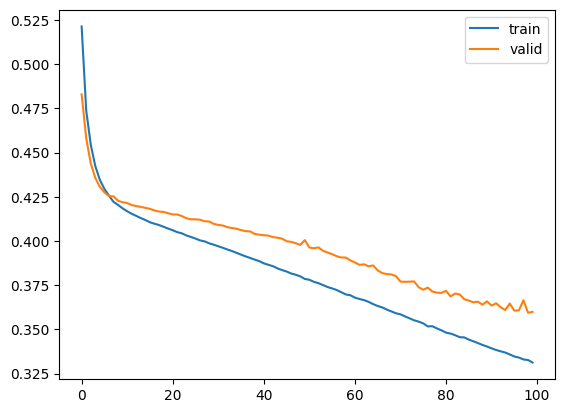

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

## Complete the code to evaluate the model on X_test and y_test
results = classifier.evaluate(X_test, y_test)

***CONFUSION MATRIX***

50/50 [==============================] - 0s 2ms/step


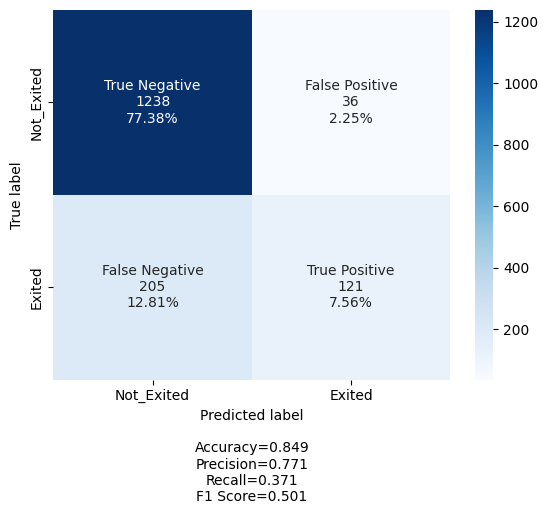

In [ ]:
## Complete the code to obtain the prediction on X_val and obtain the confusion matrix
y_pred1=classifier.predict(X_val)

#Let's predict using default threshold
y_pred1 = (y_pred1 > 0.5)
cm2=confusion_matrix(y_val, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2, group_names=labels,categories=categories, cmap='Blues')

#***MODEL BUILDING: NEURAL NETWORK W/ ADAM OPTIMIZRER***

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
def create_model():
      ## Initializing the neural network
      model = Sequential()

      ##Complete the code to add the input layer with 64 neurons and relu as activation function
      model.add(Dense(64,activation='relu',input_dim = X_train.shape[1]))

      ## Complete the code to add the first hidden layer with 32 neurons with relu as activation functions
      model.add(Dense(32,activation='relu'))

      ## Complete the code to add the output layer with Sigmoid Activation
      model.add(Dense(1, activation = 'sigmoid'))

      ## Complete the code to initialize the model with Adam Optimer
      optimizer = tf.keras.optimizers.Adam(0.001)

      ## Complete the code to compile the model with binary cross entropy as loss function and accuracy as metrics
      model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
      return model

In [ ]:
model=create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


In [ ]:
## Complete the code to fit the model on train data
history = model.fit(X_train,y_train,batch_size=32,validation_data=(X_val,y_val),epochs=100,verbose=1)

Epoch 1/100
200/200 [==============================] - 3s 7ms/step - loss: 0.4512 - accuracy: 0.7998 - val_loss: 0.4334 - val_accuracy: 0.8106
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4101 - accuracy: 0.8283 - val_loss: 0.4179 - val_accuracy: 0.8263
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3970 - accuracy: 0.8323 - val_loss: 0.4079 - val_accuracy: 0.8350
Epoch 4/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3866 - accuracy: 0.8347 - val_loss: 0.4029 - val_accuracy: 0.8356
Epoch 5/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3754 - accuracy: 0.8403 - val_loss: 0.3963 - val_accuracy: 0.8350
Epoch 6/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3662 - accuracy: 0.8467 - val_loss: 0.3873 - val_accuracy: 0.8425
Epoch 7/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3595 - accuracy: 0.8481 - val_loss: 0.3798 - val_accuracy: 0.8456

***LOSS FUNCTION***

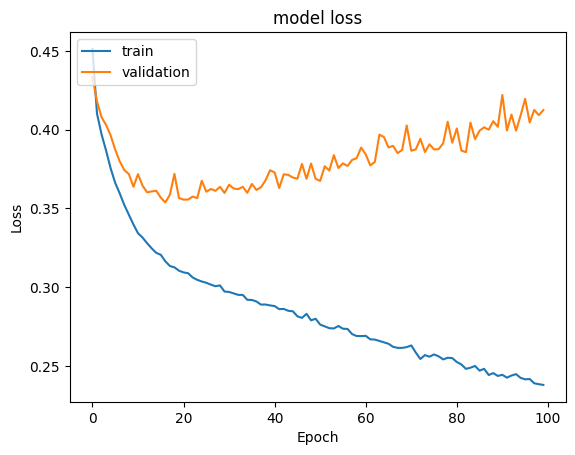

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#Importing classback API
# Defining Early stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

## Complete the code to call the create_model() function
model_e= create_model()

## Complete the code to train the model on X_train and y_train for 100 epochs and also use X_val and y_val as validation_data
history_e = model_e.fit(X_train,y_train,batch_size=32,epochs=100,verbose=1,validation_data=(X_val,y_val),callbacks=[es_cb])

Epoch 1/100
200/200 [==============================] - 2s 4ms/step - loss: 0.4674 - accuracy: 0.7867 - val_loss: 0.4273 - val_accuracy: 0.8169
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4124 - accuracy: 0.8238 - val_loss: 0.4140 - val_accuracy: 0.8238
Epoch 3/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3972 - accuracy: 0.8342 - val_loss: 0.4032 - val_accuracy: 0.8369
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3846 - accuracy: 0.8386 - val_loss: 0.3953 - val_accuracy: 0.8369
Epoch 5/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3730 - accuracy: 0.8414 - val_loss: 0.3869 - val_accuracy: 0.8406
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3638 - accuracy: 0.8461 - val_loss: 0.3738 - val_accuracy: 0.8475
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3557 - accuracy: 0.8523 - val_loss: 0.3686 - val_accuracy: 0.8438

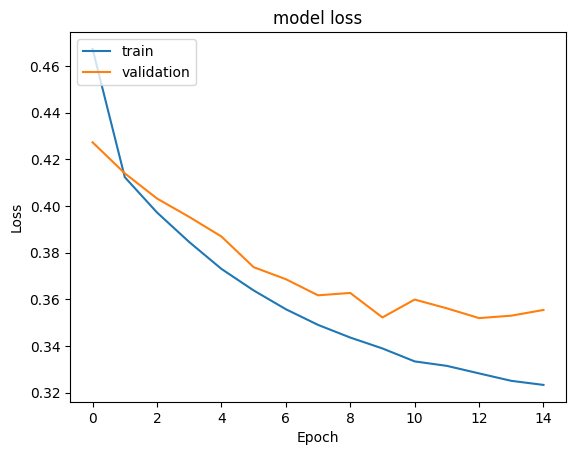

In [ ]:
# Plotting Train Loss vs Validation Loss
plt.plot(history_e.history['loss'])
plt.plot(history_e.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

200/200 [==============================] - 0s 2ms/step
Best Threshold=0.171617, G-Mean=0.803


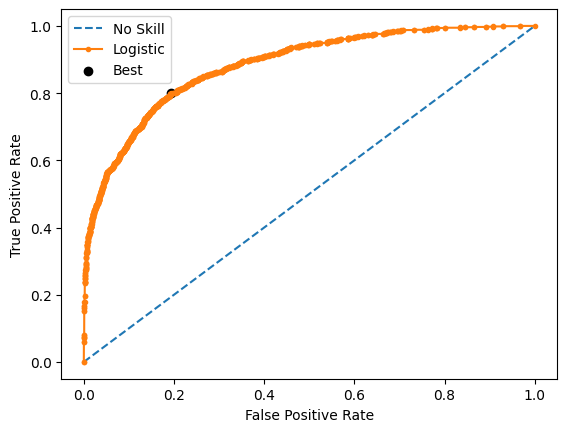

In [ ]:
# predict probabilities
yhat = model_e.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

PREDICT RESULTS USING BEST THRESHOLD


In [ ]:
#Predicting the results using best as a threshold
y_pred_e=model_e.predict(X_val)
y_pred_e = (y_pred_e > thresholds[ix])
y_pred_e

50/50 [==============================] - 0s 1ms/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

CLASSIFICATION REPORT

In [ ]:
## Complete the code to obtain the classification report Hint: use y_val
cr=metrics.classification_report(y_val,y_pred_e)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1274
           1       0.49      0.76      0.59       326

    accuracy                           0.79      1600
   macro avg       0.71      0.78      0.72      1600
weighted avg       0.84      0.79      0.80      1600



CONFUSION MATRIX

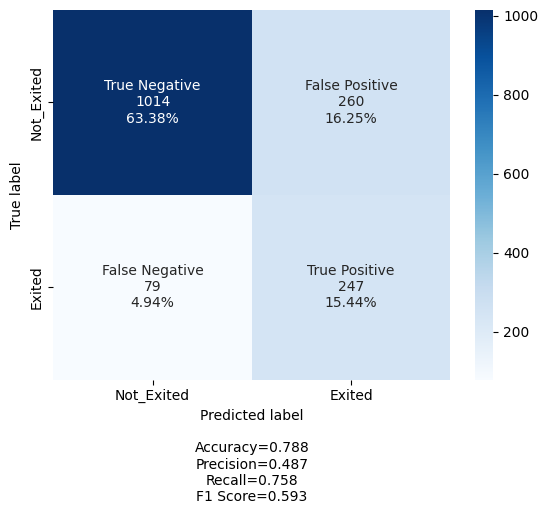

In [ ]:
## Complete the code with y_val and y_pred_e to plot the confusion matrix

cm1=confusion_matrix(y_val, y_pred_e)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm1, group_names=labels,categories=categories,cmap='Blues')

***MODEL IMPROVEMENT: NEURAL NETWROK MODEL W/ DROPOUT***

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the neural network
model_3 = Sequential()

#Adding the input layer with 32 neurons and relu as activation function
model_3.add(Dense(32,activation='relu',input_dim = X_train.shape[1]))

# Complete the code to add dropout with dropout_rate= 0.2
model_3.add(Dropout(0.2))

# Adding the first hidden layer with 16 neurons with relu as activation functions
model_3.add(Dense(16,activation='relu'))

# Complete the code to add dropout with dropout_rate= 0.1
model_3.add(Dropout(0.1))
# Adding the second hidden layer with 8 neurons with relu as activation functions
model_3.add(Dense(8,activation='relu'))

# Adding the output layer
model_3.add(Dense(1, activation = 'sigmoid'))

In [ ]:
# Summary of the model
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,057
Trainable params: 1,057
Non-trainabl

In [ ]:
# Initialize the ANN with Adam optimizer
optimizer = tf.keras.optimizers.Adam(0.001)

# Complete the code to compile the model with binary cross entropy as loss function and accuracy as metrics
model_3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [ ]:
#Fitting the ANN with batch_size = 32 and 100 epochs
history_3 = model_3.fit(X_train,y_train,batch_size=32,epochs=100,verbose=1,validation_data=(X_val,y_val),callbacks=[es_cb])

Epoch 1/100
200/200 [==============================] - 3s 5ms/step - loss: 0.5123 - accuracy: 0.7588 - val_loss: 0.4538 - val_accuracy: 0.7962
Epoch 2/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4515 - accuracy: 0.7967 - val_loss: 0.4376 - val_accuracy: 0.7981
Epoch 3/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4369 - accuracy: 0.8025 - val_loss: 0.4335 - val_accuracy: 0.8031
Epoch 4/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4310 - accuracy: 0.8073 - val_loss: 0.4329 - val_accuracy: 0.8087
Epoch 5/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4323 - accuracy: 0.8066 - val_loss: 0.4276 - val_accuracy: 0.8131
Epoch 6/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4300 - accuracy: 0.8119 - val_loss: 0.4229 - val_accuracy: 0.8200
Epoch 7/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4240 - accuracy: 0.8197 - val_loss: 0.4189 - val_accuracy: 0.8200

LOSS FUNCTION

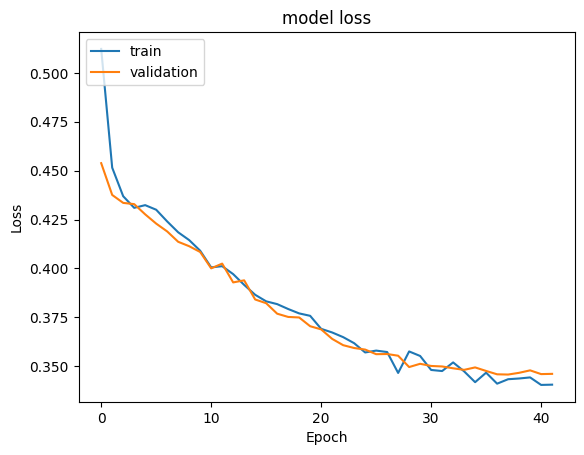

In [ ]:
# Complete the code to plot the Train Loss and Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

200/200 [==============================] - 1s 2ms/step
Best Threshold=0.209295, G-Mean=0.796


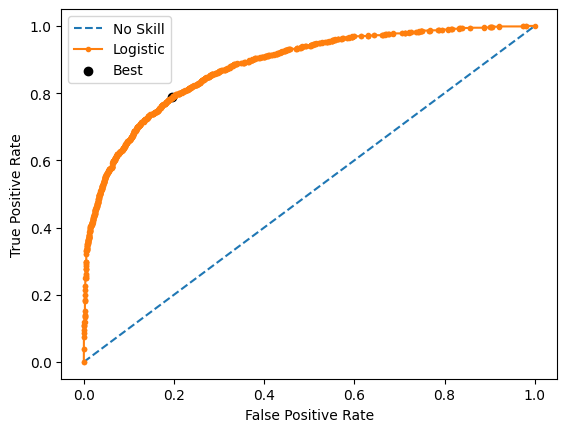

In [ ]:
# predict probabilities
yhat = model_3.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

PREDICT RESULTS USING BEST THRESHOLD

In [ ]:
#Predicting the results using best as a threshold
y_pred_e=model_3.predict(X_val)
y_pred_3 = (y_pred_e > thresholds[ix])
y_pred_3

50/50 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

CLASSIFICATION REPORT

In [ ]:
# Complete the code to obtain the classification report
cr=metrics.classification_report(y_val,y_pred_3)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1274
           1       0.50      0.78      0.61       326

    accuracy                           0.80      1600
   macro avg       0.72      0.79      0.73      1600
weighted avg       0.84      0.80      0.81      1600



CONFUSION REPORT

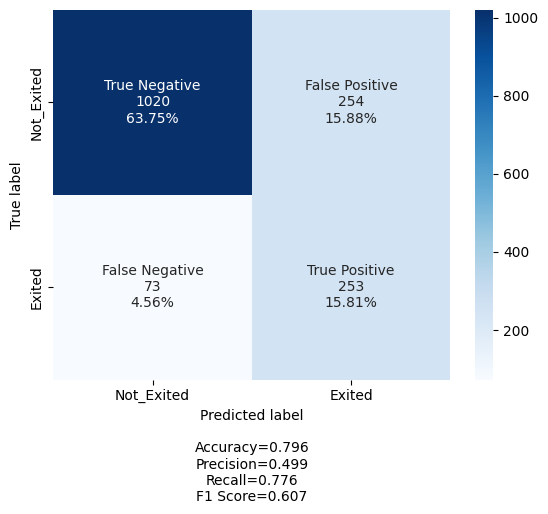

In [ ]:
# Complete the code to obtain the confusion matrix

cm1=confusion_matrix(y_val, y_pred_3)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm1,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

***MODEL IMPROVEMENT:NEURAL NETWORK MODEL W/ HYPERPARAMTER TUNING***

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
def create_model_v2(dropout_rate=0.1,lr=0.001,layer_1=64,layer_2=32):
    np.random.seed(1337)

    #Initializing the neural network
    model = Sequential()

    # This adds the input layer (by specifying input dimension)
    model.add(Dense(layer_1,activation='relu',input_dim = X_train.shape[1]))

    ## Complete the code by adding dropout with dropout rate=0.5
    model.add(Dropout(0.5))

    # # Adding the hidden layer
    # Notice that we do not need to specify input dim.
    model.add(Dense(layer_2,activation='relu'))

    # # Adding the output layer
    # Notice that we do not need to specify input dim.
    # we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
    # We use the sigmoid because we want probability outcomes
    model.add(Dense(1, activation='sigmoid'))

    # Adding Adam initializer
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

    ## Complete the code to compile the model using binary_crossentropy as loss
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [ ]:
## Complete the code by calling the creat_model_v2 function in KerasClassifier
keras_estimator = KerasClassifier(build_fn=create_model_v2, verbose=1)

In [ ]:
# define the grid search parameters
param_grid = {
    'batch_size':[40, 64, 128],
    "lr":[0.01,0.001,0.1]}


kfold_splits = 3
# Complete the code by using the the defined keras_estimator as estimator.
grid = GridSearchCV(estimator=keras_estimator,
                    verbose=1,
                    cv=kfold_splits,
                    param_grid=param_grid,n_jobs=-1)

In [ ]:
## Complete the code to fit the model on train data and use x_val and y_val as validation data
grid_result = grid.fit(X_train, y_train,validation_data = (X_val,y_val),verbose=1)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# Printing mean
means = grid_result.cv_results_['mean_test_score']
# Printing standard deviation
stds = grid_result.cv_results_['std_test_score']
# Printing best parameters
params = grid_result.cv_results_['params']

Fitting 3 folds for each of 9 candidates, totalling 27 fits
160/160 [==============================] - 2s 4ms/step - loss: 0.4548 - accuracy: 0.8034 - val_loss: 0.4318 - val_accuracy: 0.8150
Best: 0.815936 using {'batch_size': 40, 'lr': 0.01}


In [ ]:
# Creating the model
estimator_v2=create_model_v2(lr=grid_result.best_params_['lr'])
# Printing model summary
estimator_v2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                768       
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


In [ ]:
## Complete the code to fit the model on train data abd train the model with best batch_size obtained from hyperparameter tuning
history_h=estimator_v2.fit(X_train, y_train, epochs=100, batch_size = grid_result.best_params_['batch_size'], verbose=1,validation_data=(X_val,y_val))

Epoch 1/100
160/160 [==============================] - 2s 4ms/step - loss: 0.4530 - accuracy: 0.8008 - val_loss: 0.4385 - val_accuracy: 0.8062
Epoch 2/100
160/160 [==============================] - 1s 3ms/step - loss: 0.4268 - accuracy: 0.8186 - val_loss: 0.4180 - val_accuracy: 0.8281
Epoch 3/100
160/160 [==============================] - 1s 3ms/step - loss: 0.4145 - accuracy: 0.8277 - val_loss: 0.4206 - val_accuracy: 0.8213
Epoch 4/100
160/160 [==============================] - 1s 3ms/step - loss: 0.4142 - accuracy: 0.8291 - val_loss: 0.4252 - val_accuracy: 0.8319
Epoch 5/100
160/160 [==============================] - 1s 4ms/step - loss: 0.4048 - accuracy: 0.8319 - val_loss: 0.3973 - val_accuracy: 0.8356
Epoch 6/100
160/160 [==============================] - 1s 3ms/step - loss: 0.4030 - accuracy: 0.8303 - val_loss: 0.3935 - val_accuracy: 0.8325
Epoch 7/100
160/160 [==============================] - 1s 5ms/step - loss: 0.3987 - accuracy: 0.8369 - val_loss: 0.3918 - val_accuracy: 0.8288

LOSS FUNCTION

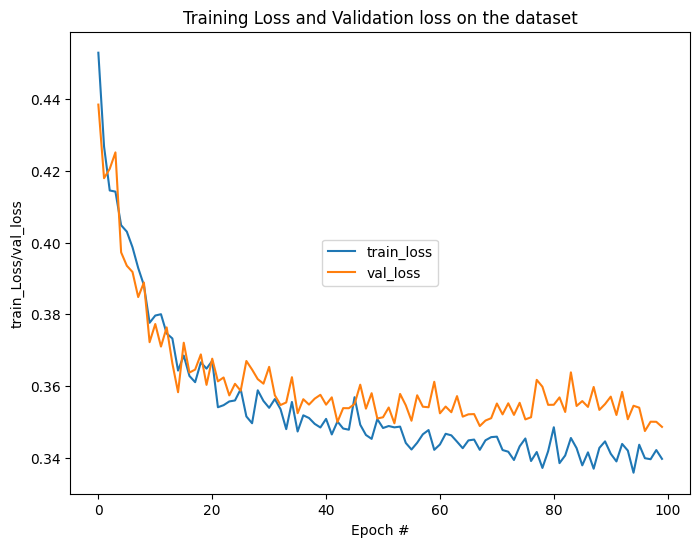

In [ ]:
N =100
plt.figure(figsize=(8,6))
plt.plot(np.arange(0, N), history_h.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history_h.history["val_loss"], label="val_loss")

plt.title("Training Loss and Validation loss on the dataset")
plt.xlabel("Epoch #")
plt.ylabel("train_Loss/val_loss")
plt.legend(loc="center")
plt.show()

THRESHOLD

200/200 [==============================] - 0s 2ms/step
Best Threshold=0.264701, G-Mean=0.807


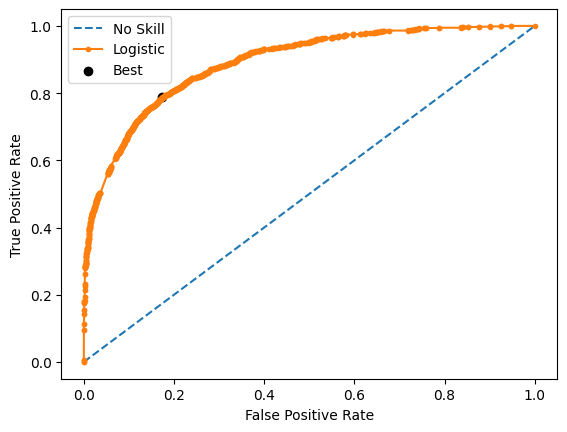

In [ ]:
# predict probabilities
yhat = estimator_v2.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

PREDICT RESULTS USING BEST THRESHOLD

In [ ]:
# Complete the code to obtain the predictions on X_val
y_pred_h = estimator_v2.predict(X_val)
print(y_pred_h)

50/50 [==============================] - 0s 2ms/step
[[0.14526473]
 [0.00179584]
 [0.03584457]
 ...
 [0.23367685]
 [0.42251557]
 [0.44159284]]


In [ ]:
# To use the confusion Matrix, we need to convert the probabilities that a customer will leave the bank into the form true or false.
# So we will use the best cutoff value  to indicate whether they are likely to exit or not.
y_pred_h = (y_pred_h > thresholds[ix])
print(y_pred_h)

[[False]
 [False]
 [False]
 ...
 [False]
 [ True]
 [ True]]


CLASSIFICATION REPORT

In [ ]:
# Complete the code to obtain the classification report
cr=metrics.classification_report(y_val,y_pred_h)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.81      0.87      1274
           1       0.51      0.76      0.61       326

    accuracy                           0.80      1600
   macro avg       0.72      0.78      0.74      1600
weighted avg       0.84      0.80      0.81      1600



CONFUSION MATRIX

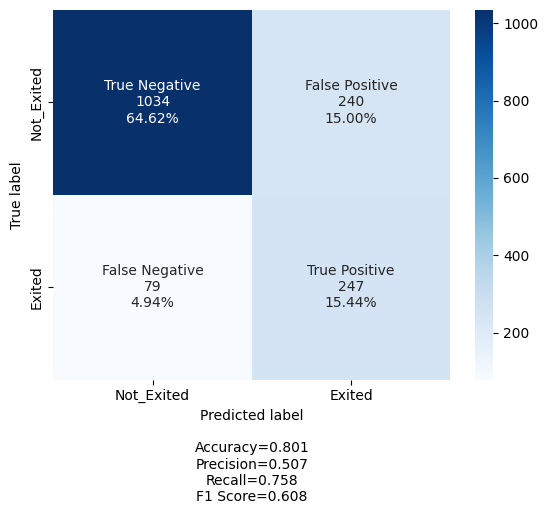

In [ ]:
## Complete the code to obtain the confusion matrix
cm_h=confusion_matrix(y_val, y_pred_h)

labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm_h,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

***MODEL IMPROVEMENT: NEURAL NETWORK MODEL W/ BALANCED DATA***

apply SMOTE to balance dataset then again apply hyperparameter tuning accordingly

In [ ]:
## Complete the code to apply SMOTE on train data
sm  = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train.shape))

After UpSampling, the shape of train_X: (10192, 11)
After UpSampling, the shape of train_y: (10192, 1) 



<Axes: ylabel='count'>

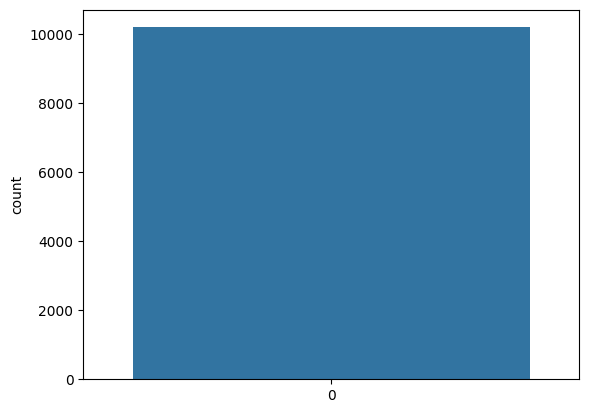

In [ ]:
sns.countplot(y_train['Exited'])

BUILD MODEL W/ BALANCED DATASET

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
## Complete the code to initilaize a sequential model
model_4 = Sequential()

# Complete the code to add a input layer of 32 neurons with relu as activation function
model_4.add(Dense(32,activation='relu',input_dim = X_train.shape[1]))

# Complete the code to add dropout with dropout rate=0.2
model_4.add(Dropout(0.2))
# Adding hidden layer with 16 neurons with relu as activation function
model_4.add(Dense(16,activation='relu'))

# Adding the dropout
model_4.add(Dropout(0.1))

## Complete the code to add dense layers with 8 neurons
model_4.add(Dense(8,activation='relu'))

# Complete the code to add suitable activation function in the final layer
model_4.add(Dense(1, activation = 'sigmoid'))

In [ ]:
## Complete the code to obtain the summary of the model
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,057
Trainable params: 1,057
Non-trainabl

In [ ]:
# Complete the code to define earlystopping as callback
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

# Initializing Adam optimizer
optimizer = tf.keras.optimizers.Adam(0.001)

# Complining the model with binary cross entropy as loss and accuracy as metrics
model_4.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])

# Complete the code to fit the model on train with batch_size of 64, epochs of 100 and callbacks as earlystopping
history_4 = model_4.fit(X_train,y_train,batch_size=64,epochs=100,verbose=1,validation_data = (X_val,y_val),callbacks=[es_cb])

Epoch 1/100
160/160 [==============================] - 2s 5ms/step - loss: 0.6432 - accuracy: 0.6333 - val_loss: 0.5592 - val_accuracy: 0.7262
Epoch 2/100
160/160 [==============================] - 1s 4ms/step - loss: 0.5762 - accuracy: 0.7093 - val_loss: 0.5494 - val_accuracy: 0.7312
Epoch 3/100
160/160 [==============================] - 1s 4ms/step - loss: 0.5575 - accuracy: 0.7249 - val_loss: 0.5267 - val_accuracy: 0.7362
Epoch 4/100
160/160 [==============================] - 1s 4ms/step - loss: 0.5484 - accuracy: 0.7318 - val_loss: 0.5455 - val_accuracy: 0.7200
Epoch 5/100
160/160 [==============================] - 1s 4ms/step - loss: 0.5414 - accuracy: 0.7327 - val_loss: 0.5335 - val_accuracy: 0.7256
Epoch 6/100
160/160 [==============================] - 1s 4ms/step - loss: 0.5314 - accuracy: 0.7353 - val_loss: 0.5340 - val_accuracy: 0.7300
Epoch 7/100
160/160 [==============================] - 1s 4ms/step - loss: 0.5199 - accuracy: 0.7435 - val_loss: 0.5139 - val_accuracy: 0.7362

LOSS FUNCTION

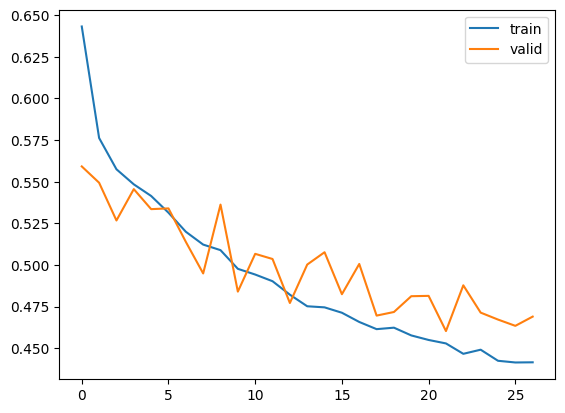

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history_4.history)
hist['epoch'] = history_4.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

FINDING THE OPTMIAL THRESHOLD

319/319 [==============================] - 1s 2ms/step
Best Threshold=0.507767, G-Mean=0.820


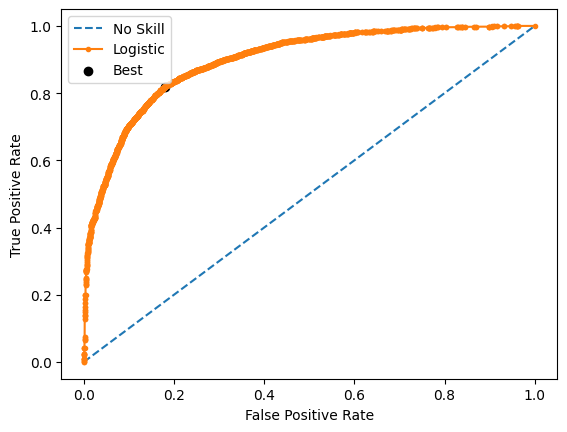

In [ ]:
## Complete the code to find the optimal threshold using X_train
yhat = model_4.predict(X_train)

# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
## Complete the code to obtain the predictions on X_val
y_pred_s = model_4.predict(X_val)
#Predicting the results using tuned threshold
y_pred_s = (y_pred_s >thresholds[ix])
y_pred_s

50/50 [==============================] - 0s 2ms/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

CLASSIFICATION REPORT

In [ ]:
cr=metrics.classification_report(y_val,y_pred_s)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.80      0.85      1274
           1       0.47      0.71      0.57       326

    accuracy                           0.78      1600
   macro avg       0.69      0.75      0.71      1600
weighted avg       0.82      0.78      0.79      1600



CONFUSION MATRIX

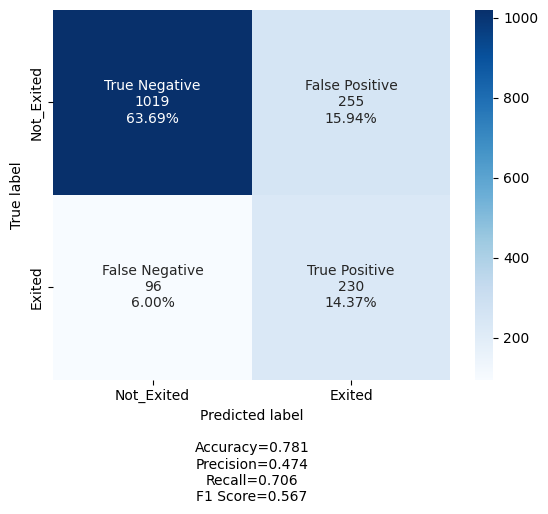

In [ ]:
#Calculating the confusion matrix
cm_s=confusion_matrix(y_val, y_pred_s)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm_s,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

***FINAL MODEL***

319/319 [==============================] - 1s 2ms/step
Best Threshold=0.213742, G-Mean=0.812


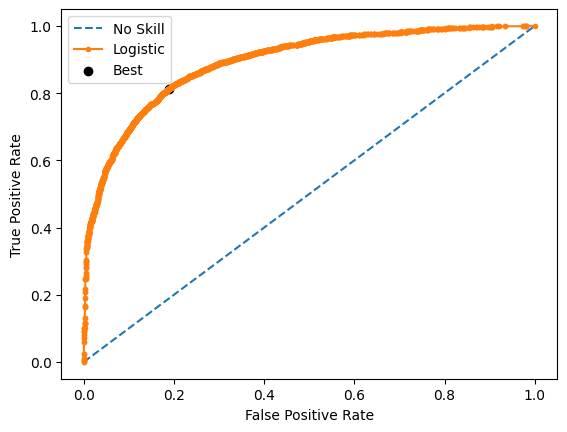

In [ ]:
# predict probabilities using the best model
yhat = model_3.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
# Complete the code to Predict the X_test data using the best model
y_pred_test = model_3.predict(X_test)
y_pred_test = (y_pred_test > thresholds[ix])
print(y_pred_test)

63/63 [==============================] - 0s 2ms/step
[[False]
 [False]
 [False]
 ...
 [ True]
 [False]
 [False]]


CLASSIFICATION REPORT

In [ ]:
## Complete the code to obtain the classification report on y_test and the predicted values
cr=metrics.classification_report(y_test,y_pred_test)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.79      0.86      1593
           1       0.49      0.77      0.60       407

    accuracy                           0.79      2000
   macro avg       0.71      0.78      0.73      2000
weighted avg       0.84      0.79      0.80      2000



CONFUSION MATRIX

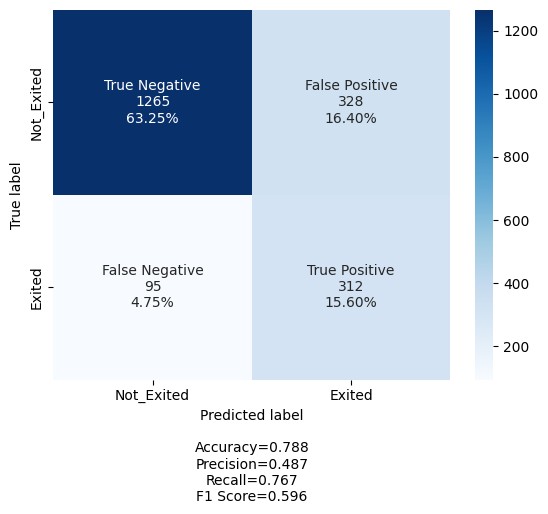

In [ ]:
# Complete the code to obtain the confusion matrix
cm_h=confusion_matrix(y_test, y_pred_test)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm_h,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')